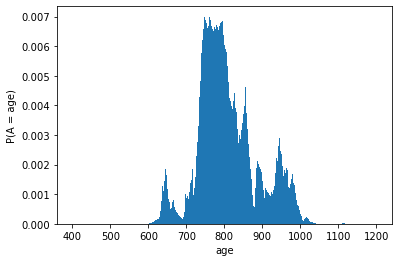

In [17]:
import json
from scipy import stats
import math
import matplotlib.pyplot as plt

historical_c14_delta = None
C14_MEAN_LIFE = 8267
MIN_AGE = 400
MAX_AGE = 1200

def main():
    belief = inference(900)
    #print(belief[850])
    #print(belief[753])
    plot_belief(belief)
    
def inference(m):
    """
    Returns a dictionary A, where A[i] contains the 
    corresponding probability, P(A = i| M = m).
    m is the number of C14 molecules remaining and i 
    is age in years. i is in the range 100 to MAX_AGE
    """
    A = {}
    n_years = MAX_AGE - MIN_AGE + 1
    for i in range(MIN_AGE,MAX_AGE+1):
        A[i] = calc_likelihood(m, i)  # P(M = m | A = i)
    # implicitly computes the normalization constant
    normalize(A)
    return A

def calc_likelihood(m, age):
    """
    Computes P(M = m | A = age), the probability of
    having m molecules left given the sample is age
    years old. Uses the exponential decay of C14
    """
    n_original = 1000 + delta_start(age)
    #n_original = 1000
    p_remain = math.exp(-age/C14_MEAN_LIFE)
    return stats.binom.pmf(m, n_original, p_remain)

def normalize(prob_dict):
    # first compute the sum of the probability
    sum = 0
    for key, pr in prob_dict.items():
        sum += pr
    # then divide each probability by that sum
    for key, pr in prob_dict.items():
        prob_dict[key] = pr / sum
    #print(sum) 
    # now the probabilities sum to 1 (aka are normalized)

def delta_start(age):
    """
    The amount of atmospheric C14 is not the same every
    year. If the sample died "age" years ago, then it would
    have started with slightly more, or slightly less than
    1000 C14 molecules. We can look this value up from the
    IntCal database. See the next section!
    """
    if not historical_c14_delta:
        load_c14_delta()
    return int(round(historical_c14_delta[age]))

def load_c14_delta():
    global historical_c14_delta
    raw = json.load(open('historical_c14.json'))
    historical_c14_delta = {}
    for age, value in raw.items():
        historical_c14_delta[int(age)] = float(value['deltaC14'])
#     print(historical_c14_delta)

def plot_belief(belief):
    # Extract keys and values from the dictionary
    x = list(belief.keys())
    y = list(belief.values())
    
    # Create a bar chart (you can use different types of plots as needed)
    plt.bar(x, y,width=1)

    # Add labels and title
    plt.xlabel('age')
    plt.ylabel('P(A = age)')

    # Show the plot
    plt.show()

if __name__ == '__main__':
  main()